In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#import machine learning libraries
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('caffeine.csv')

In [3]:
df.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [4]:
#check for null values
df.isnull().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

In [5]:
#check for duplicates
df.duplicated().sum()

0

In [6]:
types = df.groupby('type')['type'].count()

In [7]:
types

type
Coffee           173
Energy Drinks    219
Energy Shots      36
Soft Drinks       90
Tea               66
Water             26
Name: type, dtype: int64

<BarContainer object of 6 artists>

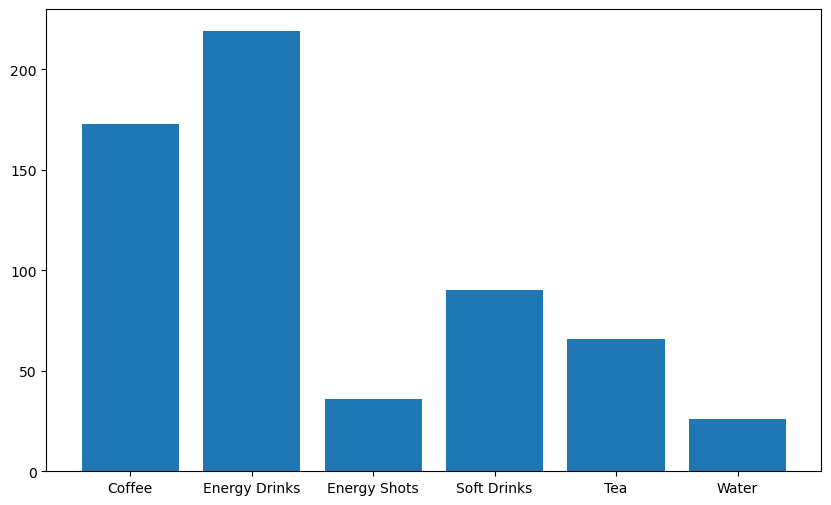

In [8]:
figure(figsize=(10, 6))
plt.bar(types.index,types.values)

In [9]:
#create a new feature: mg of caffeine per ml
df['Caffeine/ml']=df['Caffeine (mg)']/df['Volume (ml)']

In [10]:
df.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine/ml
0,Costa Coffee,256.993715,0,277,Coffee,1.077847
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,0.579555
2,Hell Energy Coffee,250.191810,150,100,Coffee,0.399693
3,Killer Coffee (AU),250.191810,0,430,Coffee,1.718681
4,Nescafe Gold,250.191810,0,66,Coffee,0.263798


In [23]:
#calculate average caffeine content per type
caffeine_content = df.groupby('type')['Caffeine/ml'].mean()
caffeine_content

type
Coffee           0.668191
Energy Drinks    0.383952
Energy Shots     3.875583
Soft Drinks      0.095067
Tea              0.172558
Water            0.144068
Name: Caffeine/ml, dtype: float64

<BarContainer object of 6 artists>

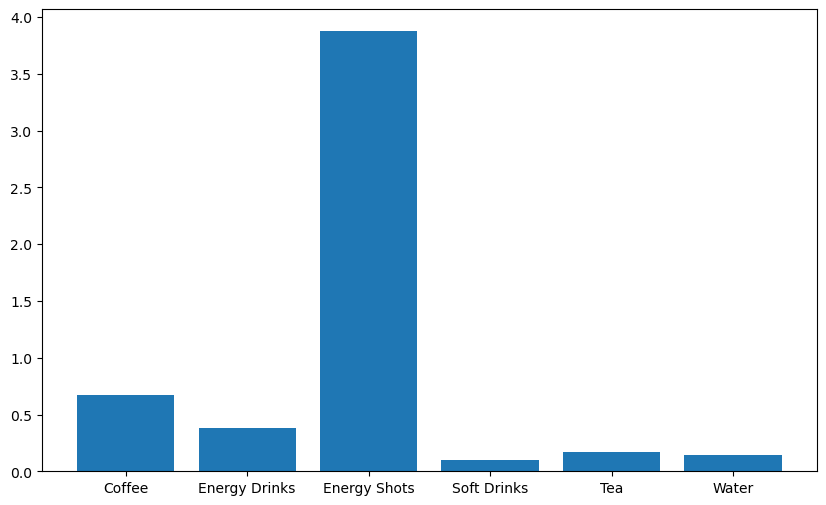

In [12]:
figure(figsize=(10, 6))
plt.bar(caffeine_content.index,caffeine_content.values)

In [25]:
#select top 10 most caffeinated drinks
ranking=df.sort_values('Caffeine (mg)',ascending=False)
ranking = ranking.head(10)
ranking

,drink,Volume (ml),Calories,Caffeine (mg),type,Caffeine/ml,cluster
85,Black Label Brewed Coffee,354.882,0,1555,Coffee,4.381738,2
102,Very Strong Coffee,354.882,0,1350,Coffee,3.804081,2
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee,3.733635,2
101,Taft Coffee (EU),354.882,0,1182,Coffee,3.330685,2
95,High Voltage Coffee (AU),354.882,0,1150,Coffee,3.240514,2
84,Black Insomnia Coffee,354.882,0,1105,Coffee,3.113711,2
89,Cannonball Coffee Maximum Charge (UK),354.882,0,1101,Coffee,3.102440,2
82,Biohazard Coffee,354.882,3,928,Coffee,2.614954,2
91,Death Wish Coffee,354.882,0,728,Coffee,2.051386,2
29,Starbucks Bottled Iced Coffee,1419.528,240,640,Coffee,0.450854,0


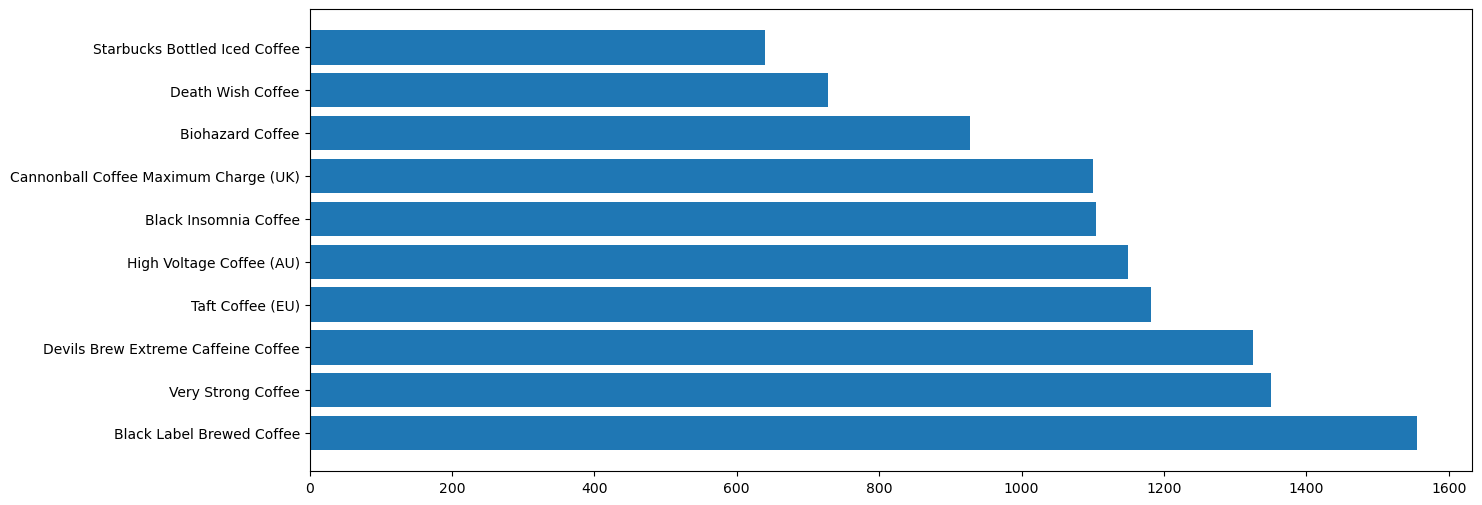

In [14]:
#plot most caffeinated drinks
figure(figsize=(15, 6))
plt.barh(ranking['drink'], ranking['Caffeine (mg)'])
plt.show()

In [15]:
#split into features and labels
X = df.drop('drink',1).drop('type',1).drop('Volume (ml)',1).drop('Caffeine (mg)',1).drop("Calories",1)

C:\Users\ajayv\AppData\Local\Temp\ipykernel_17744\2553621075.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('drink',1).drop('type',1).drop('Volume (ml)',1).drop('Caffeine (mg)',1).drop("Calories",1)
C:\Users\ajayv\AppData\Local\Temp\ipykernel_17744\2553621075.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('drink',1).drop('type',1).drop('Volume (ml)',1).drop('Caffeine (mg)',1).drop("Calories",1)
C:\Users\ajayv\AppData\Local\Temp\ipykernel_17744\2553621075.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('drink',1).drop('type',1).drop('Volume (ml)',1).drop('Caffeine (mg)',1).drop("Calories",1)
C:\Users\ajayv\AppData\Local\Temp\ipykernel_17744\2553621075.py:2: FutureWarning: In a f

In [16]:
#k means clustering, create 3 clusters based on caffeine and calories
kmeans = KMeans(n_clusters=3, random_state=0)

In [17]:
#obtain cluster labels
labels = kmeans.fit_predict(X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
#add extra cluster column to original dataset
df['cluster'] = labels

Text(0, 0.5, 'Caffeine/mL')

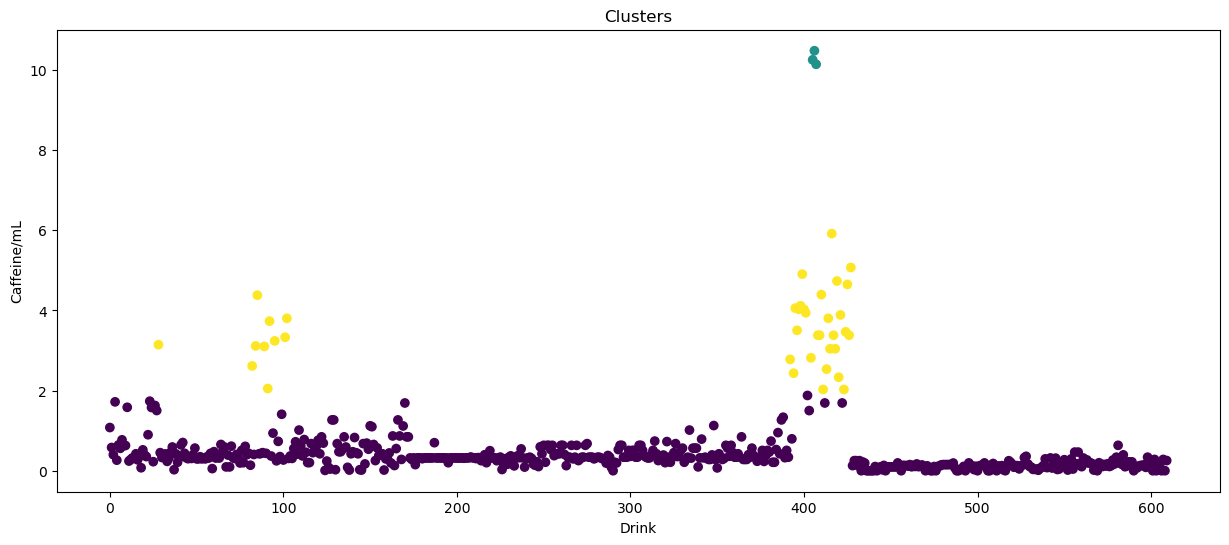

In [19]:
figure(figsize=(15, 6))
plt.scatter(range(0,len(df)),df["Caffeine/ml"],c=kmeans.labels_.astype(float))

plt.title("Clusters") 
plt.xlabel("Drink") 
plt.ylabel("Caffeine/mL")

In [20]:
#obtain cluster 0 results
df.loc[df['cluster'] == 0].groupby('type')['type'].count()

type
Coffee           163
Energy Drinks    219
Energy Shots       5
Soft Drinks       90
Tea               66
Water             26
Name: type, dtype: int64

In [21]:
#obtain cluster 1 results
df.loc[df['cluster'] == 1].groupby('type')['type'].count()

type
Energy Shots    3
Name: type, dtype: int64

In [22]:
#obtain cluster 2 results
df.loc[df['cluster'] == 2].groupby('type')['type'].count()

type
Coffee          10
Energy Shots    28
Name: type, dtype: int64